In [1]:
!git clone https://github.com/sangsucki/DataDrivenReport.git

Cloning into 'DataDrivenReport'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 98 (delta 26), reused 61 (delta 16), pack-reused 0
Receiving objects: 100% (98/98), 25.58 MiB | 18.63 MiB/s, done.
Resolving deltas: 100% (26/26), done.


In [2]:
pwd

'/content'

In [5]:
import pandas as pd
df = pd.read_csv("/content/DataDrivenReport/car.csv")
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)

In [7]:
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [31]:
df = df.rename(columns={"Engine HP":"HP", "Engine Cylinders":"Cylinders", "Transmission Type":"Transmission", "Driven_Wheels":"Drive Mode","highway MPG":"MPG-H", "city mpg":"MPG-C", "MSRP":"Price"})

In [9]:
df.shape

(11914, 10)

In [12]:
dulicate_rows_df = df[df.duplicated()]
print("number of duplicated rows",dulicate_rows_df)

number of duplicated rows          Make     Model  Year  Engine HP  Engine Cylinders Transmission Type  \
14        BMW  1 Series  2013      230.0               6.0            MANUAL   
18       Audi       100  1992      172.0               6.0            MANUAL   
20       Audi       100  1992      172.0               6.0            MANUAL   
24       Audi       100  1993      172.0               6.0            MANUAL   
25       Audi       100  1993      172.0               6.0            MANUAL   
...       ...       ...   ...        ...               ...               ...   
11481  Suzuki      X-90  1998       95.0               4.0            MANUAL   
11603   Volvo      XC60  2017      302.0               4.0         AUTOMATIC   
11604   Volvo      XC60  2017      240.0               4.0         AUTOMATIC   
11708  Suzuki       XL7  2008      252.0               6.0         AUTOMATIC   
11717  Suzuki       XL7  2008      252.0               6.0         AUTOMATIC   

           Dr

In [13]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [14]:
df.count()

Make                 10925
Model                10925
Year                 10925
Engine HP            10856
Engine Cylinders     10895
Transmission Type    10925
Driven_Wheels        10925
highway MPG          10925
city mpg             10925
MSRP                 10925
dtype: int64

In [15]:
print(df.isnull().sum())

Make                  0
Model                 0
Year                  0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
highway MPG           0
city mpg              0
MSRP                  0
dtype: int64


In [16]:
df = df.dropna()

In [17]:
df.count()

Make                 10827
Model                10827
Year                 10827
Engine HP            10827
Engine Cylinders     10827
Transmission Type    10827
Driven_Wheels        10827
highway MPG          10827
city mpg             10827
MSRP                 10827
dtype: int64

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3-Q1
df, IQR = df.align(IQR, axis=1)

KeyError: "None of [Index(['price'], dtype='object')] are in the [columns]"

In [26]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(9191, 10)

array([[<Axes: title={'center': 'Price'}>]], dtype=object)

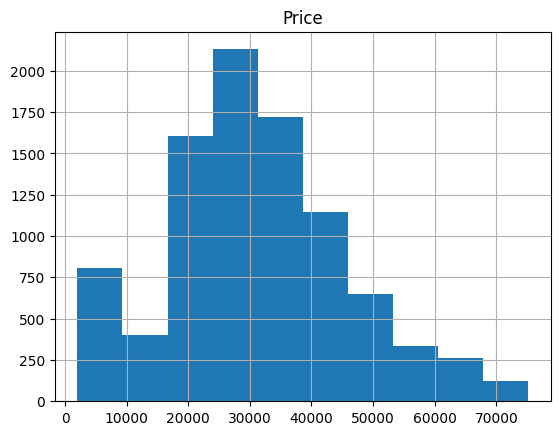

In [33]:
df.hist(column='Price')

In [38]:
df.head(1)
df.Make

0            BMW
1            BMW
2            BMW
3            BMW
4            BMW
          ...   
11909      Acura
11910      Acura
11911      Acura
11912      Acura
11913    Lincoln
Name: Make, Length: 9191, dtype: object

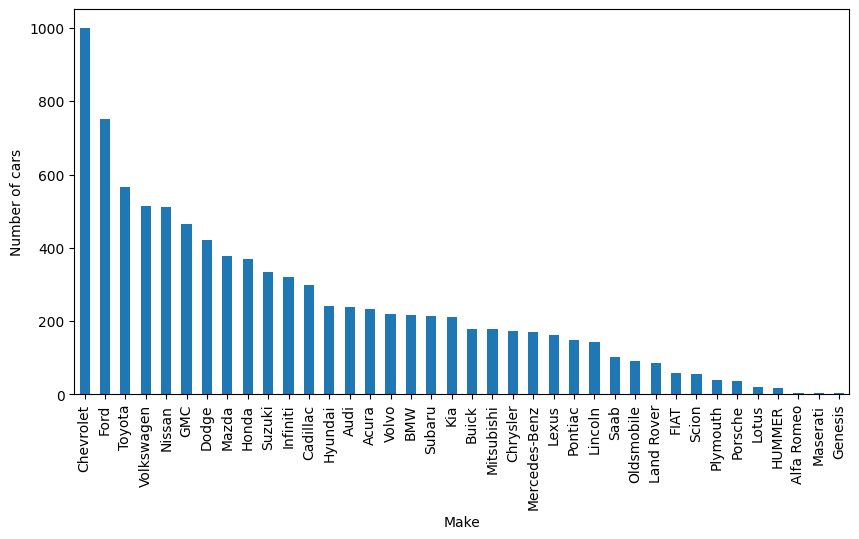

In [41]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title = ("Number of cars by make")
plt.ylabel("Number of cars")
plt.xlabel("Make");
plt.show()

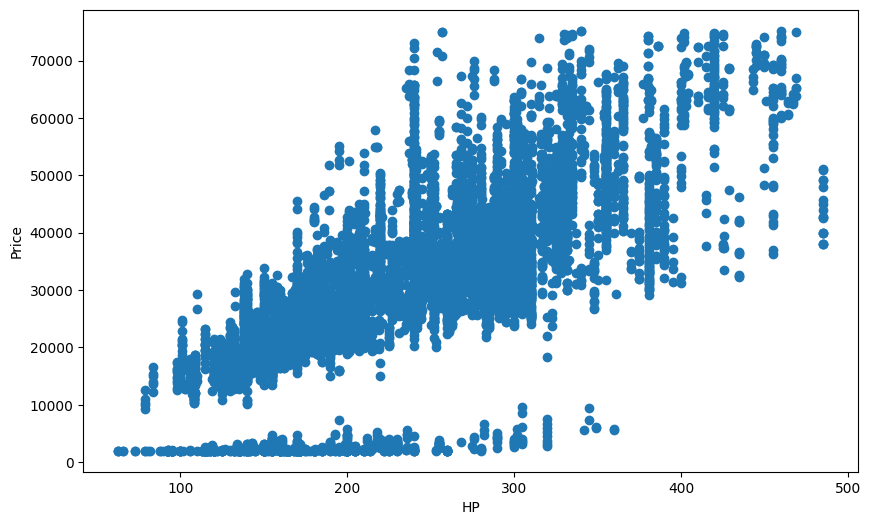

In [59]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

In [56]:
df_price =  df.sort_values("Price")

In [57]:
df_price

,Drive Mode,Cylinders,HP,Price,Make,Model,Transmission,Year,MPG-C,MPG-H
7128,front wheel drive,6.0,164.0,2000,Mazda,MX-6,MANUAL,1995,18,24
918,front wheel drive,6.0,172.0,2000,Audi,90,MANUAL,1995,17,24
982,rear wheel drive,6.0,193.0,2000,Mazda,929,AUTOMATIC,1994,17,22
983,rear wheel drive,6.0,193.0,2000,Mazda,929,AUTOMATIC,1995,17,22
990,rear wheel drive,4.0,114.0,2000,Volvo,940,AUTOMATIC,1994,17,24
...,...,...,...,...,...,...,...,...,...,...
4292,rear wheel drive,4.0,257.0,74995,Lotus,Exige,MANUAL,2009,20,26
10021,rear wheel drive,8.0,469.0,75010,Cadillac,STS-V,AUTOMATIC,2007,12,19
3027,rear wheel drive,8.0,460.0,75195,Chevrolet,Corvette,MANUAL,2017,16,25
2388,rear wheel drive,6.0,340.0,75200,Porsche,Cayman,MANUAL,2015,19,26


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


,Cylinders,HP,Price,Year,MPG-C,MPG-H
Cylinders,1.000000,0.715237,0.354013,-0.133920,-0.755540,-0.703856
HP,0.715237,1.000000,0.739042,0.326726,-0.544551,-0.443807
Price,0.354013,0.739042,1.000000,0.592983,-0.180515,-0.106320
Year,-0.133920,0.326726,0.592983,1.000000,0.338145,0.378479
MPG-C,-0.755540,-0.544551,-0.180515,0.338145,1.000000,0.939141
MPG-H,-0.703856,-0.443807,-0.106320,0.378479,0.939141,1.000000


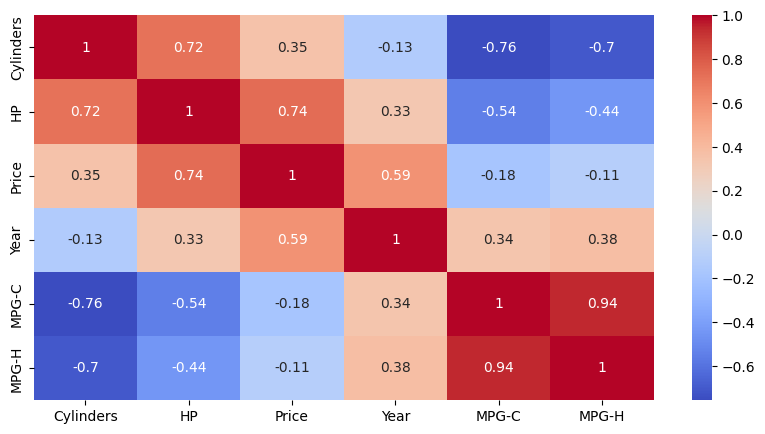

In [65]:
plt.figure(figsize=(10,5))
# 데이터프레임의 수치형 데이터 열 중에서 각 변수간의 상관관계를 구한다
c = df.corr(numeric_only=True)
sns.heatmap(c, cmap="coolwarm", annot=True)
c

# 가격 변수는 주로 마력(HP), 엔진 크기(Cylinders) 및 연식(year)에 따라 달라지는 것 확인 가능

In [66]:
pwd

'/content'